# Context

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention
programs."

## Content

The Orange Telecom's Churn Dataset, which consists of cleaned customer activity data (features), along with a churn label

specifying whether a customer canceled the subscription, will be used to develop predictive models. Two datasets are made

available here: The churn-80 and churn-20 datasets can be downloaded.

The two sets are from the same batch, but have been split by an 80/20 ratio. As more data is often desirable for developing ML

models, let's use the larger set (that is, churn-80) for training and cross-validation purposes, and the smaller set (that is,

churn-20) for final testing and model performance evaluation.

## Inspiration

To explore this type of models and learn more about the subject.

In [12]:
from platform import python_version

print(python_version())

3.8.3


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"]=(15,5)
import matplotlib.ticker as mtick
from IPython.display import Image
import matplotlib as mlp
import os
import sklearn
import json


# Remove warnings
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
#import imblearn
#from imblearn.over_sampling import SMOTE
#from pycaret.classification import * 

In [16]:
# Reading of our files 
train= pd.read_csv(r"C:\Users\DMONGARE\Desktop\J projects\Telecom Churn Dataset\churn-bigml-80.csv")
test = pd.read_csv(r"C:\Users\DMONGARE\Desktop\J projects\Telecom Churn Dataset\churn-bigml-20.csv")

In [17]:
train.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [18]:
test.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [19]:
# Another way of reading your data which i highly reccomnend or better understanding of your data
train.iloc[:,0:].transpose()

,0,1,2,3,4,5,6,7,8,9,...,2656,2657,2658,2659,2660,2661,2662,2663,2664,2665
State,KS,OH,NJ,OH,OK,AL,MA,MO,WV,RI,...,GA,MD,IN,OH,OH,SC,AZ,WV,RI,TN
Account length,128,107,137,84,75,118,121,147,141,74,...,122,62,117,78,96,79,192,68,28,74
Area code,415,415,415,408,415,510,510,415,415,415,...,510,408,415,408,415,415,415,415,510,415
International plan,No,No,No,Yes,Yes,Yes,No,Yes,Yes,No,...,Yes,No,No,No,No,No,No,No,No,No
Voice mail plan,Yes,Yes,No,No,No,No,Yes,No,Yes,No,...,No,No,No,No,No,No,Yes,No,No,Yes
Number vmail messages,25,26,0,0,0,0,24,0,37,0,...,0,0,0,0,0,0,36,0,0,25
Total day minutes,265.1,161.6,243.4,299.4,166.7,223.4,218.2,157,258.6,187.7,...,140,321.1,118.4,193.4,106.6,134.7,156.2,231.1,180.8,234.4
Total day calls,110,123,114,71,113,98,88,79,84,127,...,101,105,126,99,128,98,77,57,109,113
Total day charge,45.07,27.47,41.38,50.9,28.34,37.98,37.09,26.69,43.96,31.91,...,23.8,54.59,20.13,32.88,18.12,22.9,26.55,39.29,30.74,39.85
Total eve minutes,197.4,195.5,121.2,61.9,148.3,220.6,348.5,103.1,222,163.4,...,196.4,265.5,249.3,116.9,284.8,189.7,215.5,153.4,288.8,265.9


In [20]:
test.iloc[:,0:].transpose()

,0,1,2,3,4,5,6,7,8,9,...,657,658,659,660,661,662,663,664,665,666
State,LA,IN,NY,SC,HI,AK,MI,ID,VA,WI,...,AZ,KS,CA,IN,CA,WI,AL,VT,WV,CT
Account length,117,65,161,111,49,36,65,119,10,68,...,48,57,127,114,84,114,106,60,159,184
Area code,408,415,415,415,510,408,415,415,408,415,...,415,415,510,408,415,415,408,415,415,510
International plan,No,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,Yes
Voice mail plan,No,No,No,No,No,Yes,No,No,No,No,...,Yes,No,No,No,No,Yes,Yes,No,No,No
Number vmail messages,0,0,0,0,0,30,0,0,0,0,...,27,0,0,0,0,26,29,0,0,0
Total day minutes,184.5,129.1,332.9,110.4,119.3,146.3,211.3,159.1,186.1,148.8,...,141.1,158.1,107.9,203.8,280,137.1,83.6,193.9,169.8,213.8
Total day calls,97,137,67,103,117,128,120,114,112,70,...,109,117,128,85,113,88,131,118,114,105
Total day charge,31.37,21.95,56.59,18.77,20.28,24.87,35.92,27.05,31.64,25.3,...,23.99,26.88,18.34,34.65,47.6,23.31,14.21,32.96,28.87,36.35
Total eve minutes,351.6,228.5,317.8,137.3,215.1,162.5,162.6,231.3,190.2,246.5,...,224.7,115.2,187,87.8,202.2,155.7,203.9,85,197.7,159.6


## Data Cleaning

In [21]:
# Checking for null values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [22]:
# Clearly we can see that no null values are present in our dataset 
train.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [23]:
train.shape

(2666, 20)

In [24]:
test.shape

(667, 20)

In [25]:
train.dtypes # types of data in dataset

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [26]:
# I decided to join the two data sets, the train and test set
DF=[train,test]
df=pd.concat(DF)

In [27]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Exploratory Data Analysis

In [28]:
# Distribution of target variable
df["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

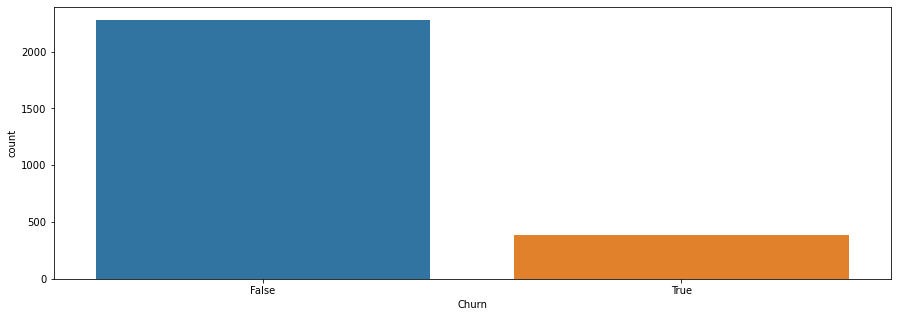

In [29]:
#Visualize the target variable
sns.countplot(train['Churn'])

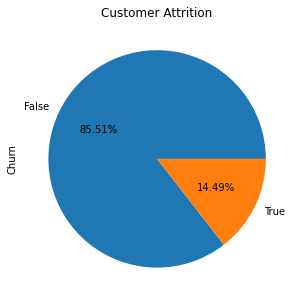

In [30]:
plt.figure(figsize=[5,5])
plt.title('Customer Attrition')
df['Churn'].value_counts().plot.pie(autopct='%1.2f%%')
plt.show()

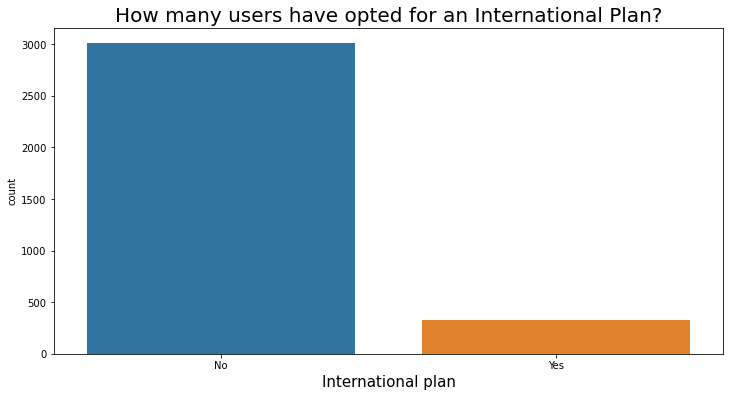

In [31]:
# We can see that not many users opt for International plans.
plt.figure(figsize = (12,6))
sns.countplot(data = df, x = 'International plan')
plt.xlabel('International plan', fontsize = 15)
plt.title('How many users have opted for an International Plan?', fontsize = 20)
plt.show()

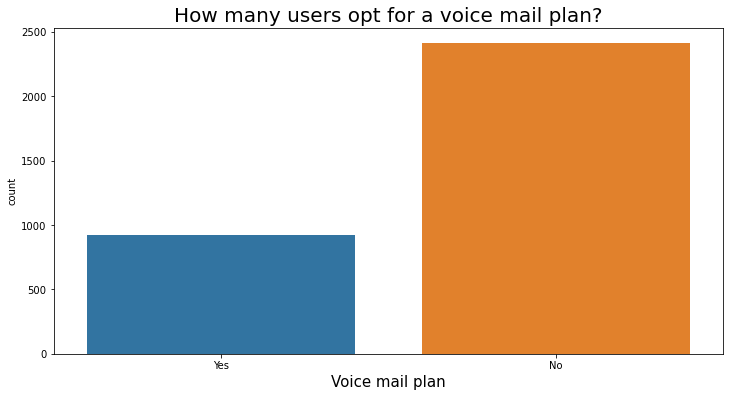

In [32]:
# Many users do not opt for a voice mail plan
plt.figure(figsize = (12,6))
sns.countplot(data = df, x = 'Voice mail plan')
plt.xlabel('Voice mail plan', fontsize = 15)
plt.title('How many users opt for a voice mail plan?', fontsize = 20)
plt.show()

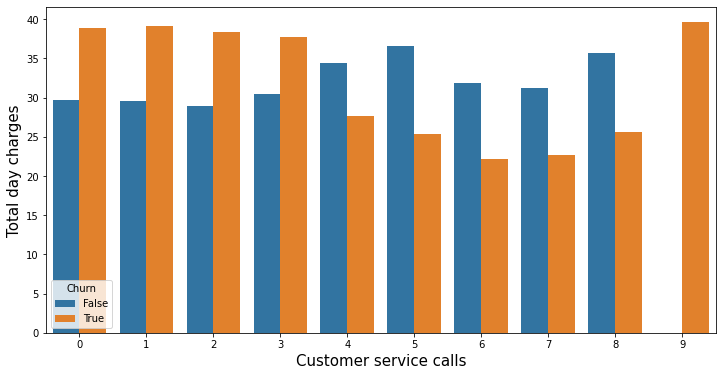

In [33]:
# How does Total day minutes spoken relate to the Churn rate
plt.figure(figsize=(12,6))
sns.barplot(data = df, x = 'Customer service calls', y = 'Total day charge', hue = 'Churn', ci = False)
plt.xlabel('Customer service calls', fontsize = 15)
plt.ylabel('Total day charges', fontsize = 15)
plt.show()

- We can see that if customer service calls are made more than 7 times, then the service is bound to be cancelled. This also comes with high charges imposed on the user.

- At the same time we can see that many users leave the service over 1 to 3 calls made to the customer service when are charged more. Analysis of the total day charge to the minutes spoken over churn rate could give us a better understanding of the same.

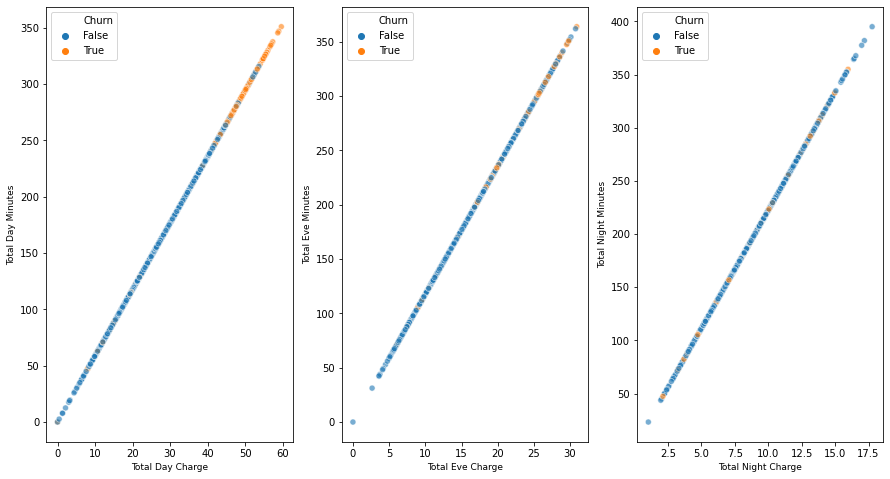

In [34]:
plt.figure(figsize = (15,8))
plt.subplot(1,3,1)
sns.scatterplot(data = df, x = 'Total day charge', y = 'Total day minutes',
                hue = 'Churn', alpha = 0.6)
plt.xlabel('Total Day Charge', fontsize = 9)
plt.ylabel('Total Day Minutes', fontsize = 9)

plt.subplot(1,3,2)
sns.scatterplot(data = df, x = 'Total eve charge', y = 'Total eve minutes',
                hue = 'Churn', alpha = 0.6)
plt.xlabel('Total Eve Charge', fontsize = 9)
plt.ylabel('Total Eve Minutes', fontsize = 9)

plt.subplot(1,3,3)
sns.scatterplot(data = df, x = 'Total night charge', y = 'Total night minutes',
                hue = 'Churn', alpha = 0.6)
plt.xlabel('Total Night Charge', fontsize = 9)
plt.ylabel('Total Night Minutes', fontsize = 9)

plt.show()

### Inference:

We can observe from the three scatterplots that the churn rate is maximum times True in the Day.

In the evening and night we can see that the churn rate is not so relevant.


## How do Users with international plan relate with the churn?

Text(14.167013888888896, 0.5, 'Count')

<Figure size 1080x576 with 0 Axes>

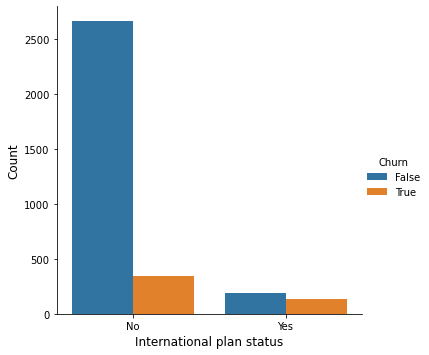

In [35]:
plt.figure(figsize = (15,8))
sns.catplot(data = df, x ='International plan', hue = 'Churn',
           kind = 'count')
plt.xlabel('International plan status', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

Inference:
- Users who Have an international plan are relatively very less than those who do not.
- We can also observe that people who have an international plan have almost equal churn rate.

Conclusion

- Based on my observation I can see that most people who leave the service are the ones who use the service in the day/morning.
- It can also be observed that most people who use the service in the morning speak for shorter amounts of time but make more calls.
- International plan users are more consistent with their churn w.r.t the ones who do not have the service.

Prescription:
- Introducing plans which minimize costs for more number of calls can be used.
- Decreasing the prices as the talk-time increases can be an effective way to reduce the churn.
- Improvement in the customer service can be done to reduce the number of calls which cause the churn.

ROHIT VENKATESAN notebook owner 

## Churn by State

ozzael-codes
/
CustomerChurnAnalysis

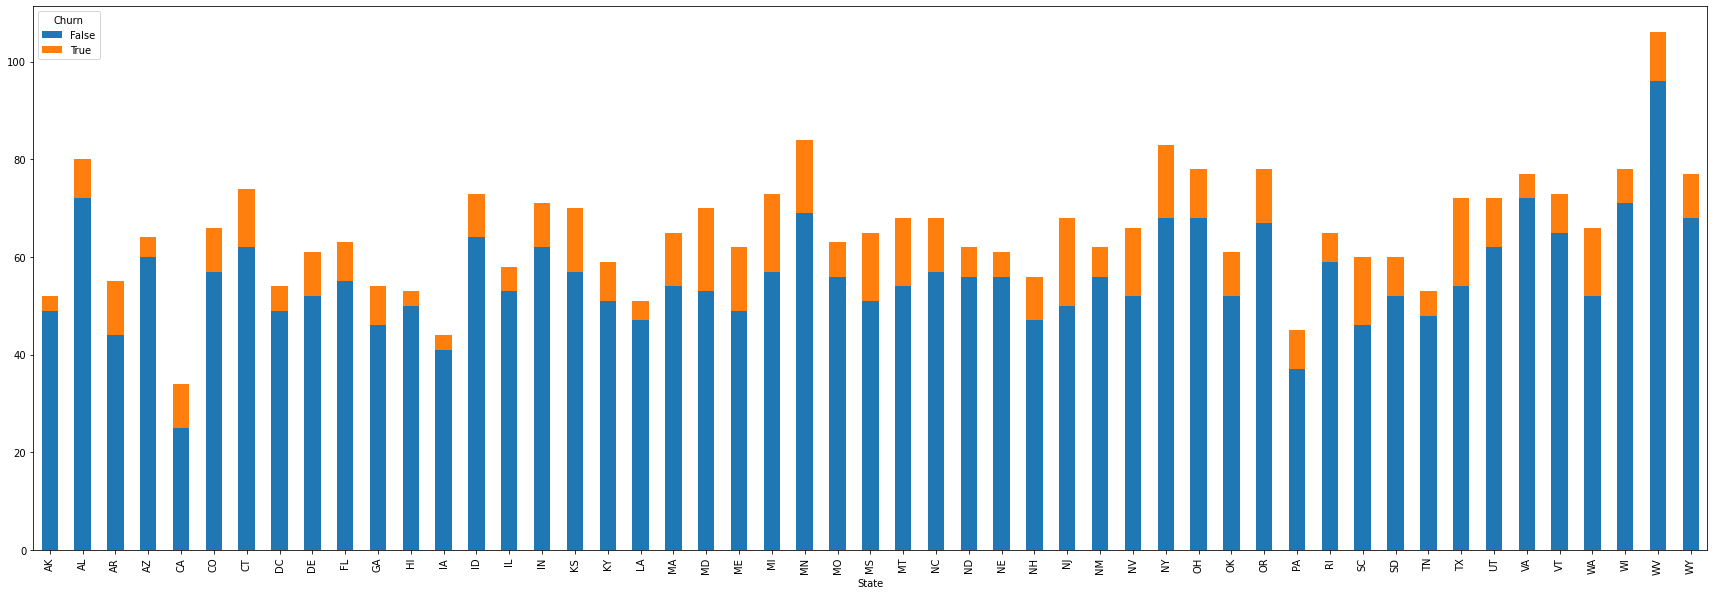

In [36]:
df.groupby(["State", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10)) 

## Churn by Area Code

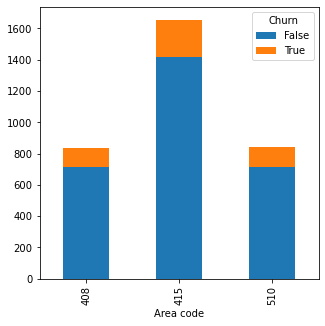

In [37]:
df.groupby(["Area code", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))

## Churn by customers with International Plan

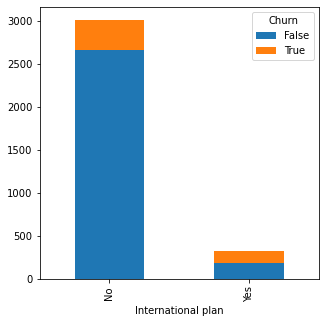

In [38]:
df.groupby(["International plan", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

## Churn By Customers with Voice mail plan

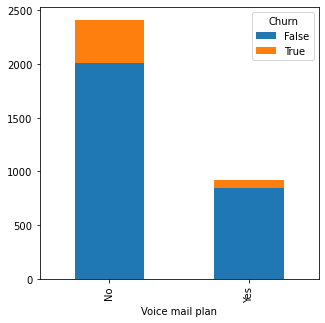

In [39]:
df.groupby(["Voice mail plan", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

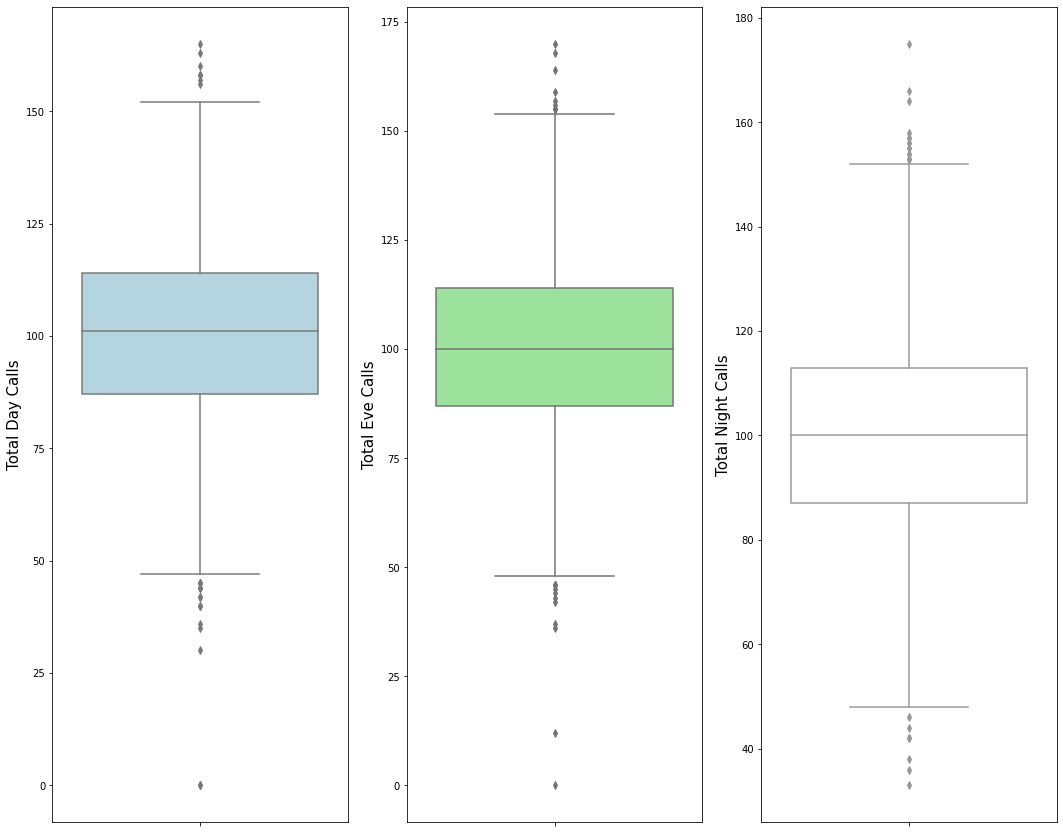

In [40]:
# We can see that more calls are made in the morning with respect to the evening and night when it is the lowest
# ROHIT VENKATESAN kaggle https://www.kaggle.com/rohitvenk/eda-on-telecom-churn
plt.figure(figsize = (18,15))
plt.subplot(1,3,1)
sns.boxplot(data=df, y = 'Total day calls', color = 'lightblue')
plt.ylabel('Total Day Calls', fontsize = 15)

plt.subplot(1,3,2)
sns.boxplot(data = df, y = 'Total eve calls', color = 'lightgreen')
plt.ylabel('Total Eve Calls', fontsize = 15)

plt.subplot(1,3,3)
sns.boxplot(data=df, y = 'Total night calls', color = 'white')
plt.ylabel('Total Night Calls', fontsize = 15)

plt.show()

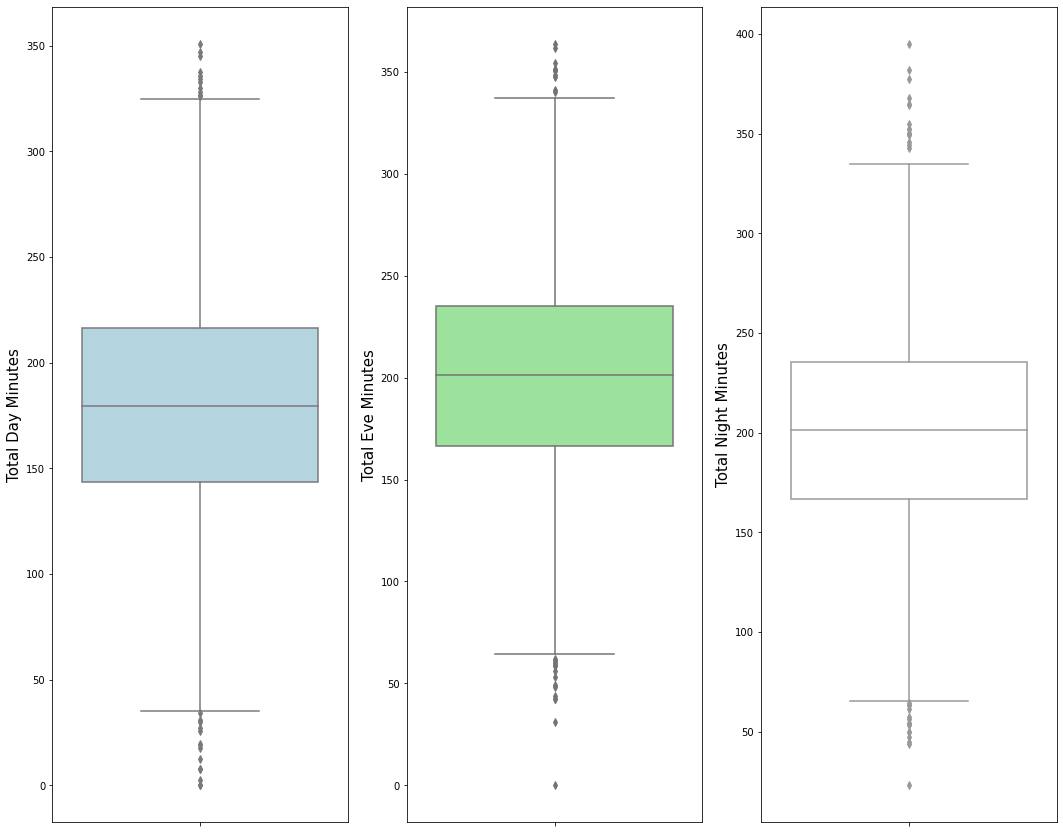

In [41]:
# Despite having more calls made during the day, we can see that users do not spend longer time on the calls in the morning.
# Users tend to talk for longer time in the afternoon than other times.

plt.figure(figsize = (18,15))
plt.subplot(1,3,1)
sns.boxplot(data=df, y = 'Total day minutes', color = 'lightblue')
plt.ylabel('Total Day Minutes', fontsize = 15)

plt.subplot(1,3,2)
sns.boxplot(data = df, y = 'Total eve minutes', color = 'lightgreen')
plt.ylabel('Total Eve Minutes', fontsize = 15)

plt.subplot(1,3,3)
sns.boxplot(data=df, y = 'Total night minutes', color = 'white')
plt.ylabel('Total Night Minutes', fontsize = 15)

plt.show()

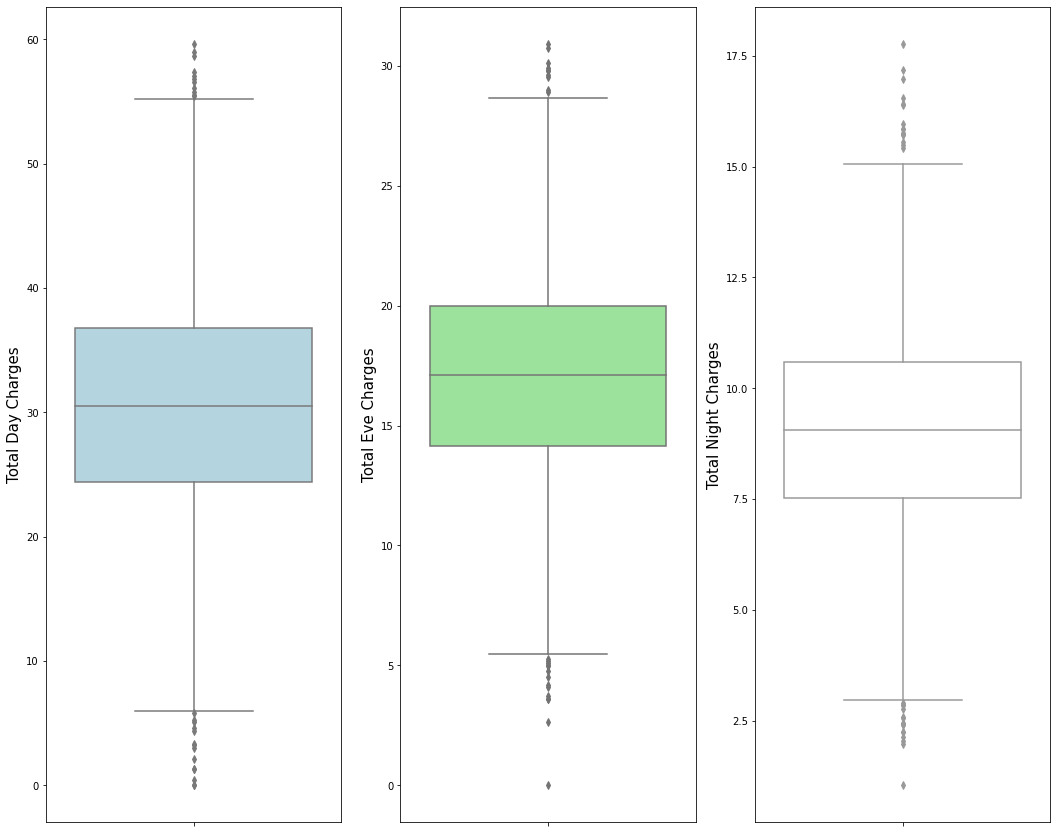

In [42]:
# The charges are maximum in the evening time and lowest in the night time.
# These plots are in conjunction with the minutes spoken.

plt.figure(figsize = (18,15))
plt.subplot(1,3,1)
sns.boxplot(data=df, y = 'Total day charge', color = 'lightblue')
plt.ylabel('Total Day Charges', fontsize = 15)

plt.subplot(1,3,2)
sns.boxplot(data = df, y = 'Total eve charge', color = 'lightgreen')
plt.ylabel('Total Eve Charges', fontsize = 15)

plt.subplot(1,3,3)
sns.boxplot(data=df, y = 'Total night charge', color = 'white')
plt.ylabel('Total Night Charges', fontsize = 15)

plt.show()

In [43]:
# Creating a new dataframe dftotal for analysis:
dftotal = pd.DataFrame(df['Churn'])

In [44]:
#Creating three columns for total minutes, total calls and total charges
dftotal['Total minutes'] = df['Total day minutes'] + df['Total eve minutes'] + df['Total night minutes']
dftotal['Total calls'] = df['Total day calls'] + df['Total eve calls'] + df['Total night calls']
dftotal['Total charges'] = df['Total day charge'] + df['Total eve charge'] + df['Total night charge']

In [45]:
dftotal.head()

,Churn,Total minutes,Total calls,Total charges
0,False,707.2,300,72.86
1,False,611.5,329,55.54
2,False,527.2,328,59.00
3,False,558.2,248,65.02
4,False,501.9,356,49.36


Text(0, 0.5, 'Total Charges')

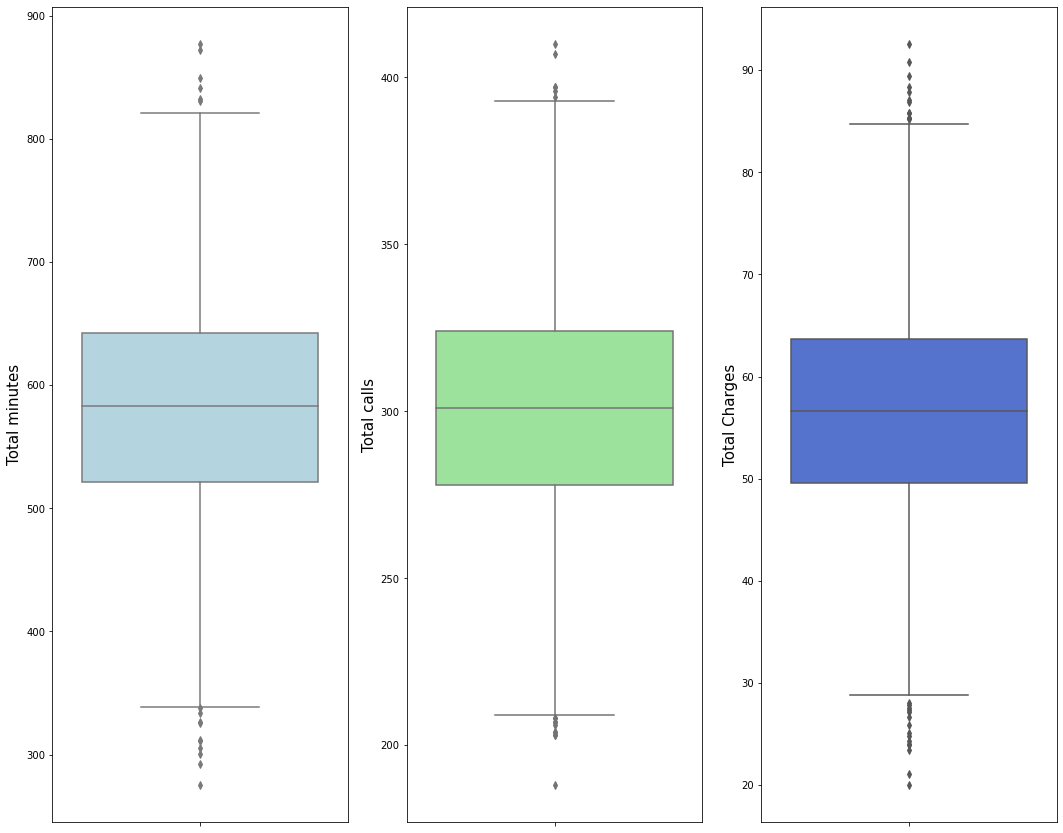

In [46]:
# Each attribute is consistent with each other suggesting normal pricing for calls made.
plt.figure(figsize=(18,15))
plt.subplot(1,3,1)
sns.boxplot(data = dftotal, y = 'Total minutes', color = 'lightblue')
plt.ylabel('Total minutes', fontsize = 15)

plt.subplot(1,3,2)
sns.boxplot(data = dftotal, y = 'Total calls', color = 'lightgreen')
plt.ylabel('Total calls', fontsize = 15)

plt.subplot(1,3,3)
sns.boxplot(data = dftotal, y = 'Total charges', color = 'royalblue')
plt.ylabel('Total Charges', fontsize = 15)

 # Correlation Anaysis

In [47]:
df.corr()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
Number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
Total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


 # Bi-Variate Analysis

In [48]:
# Building a heatmap to check correlation between each variable
corr = df.corr()

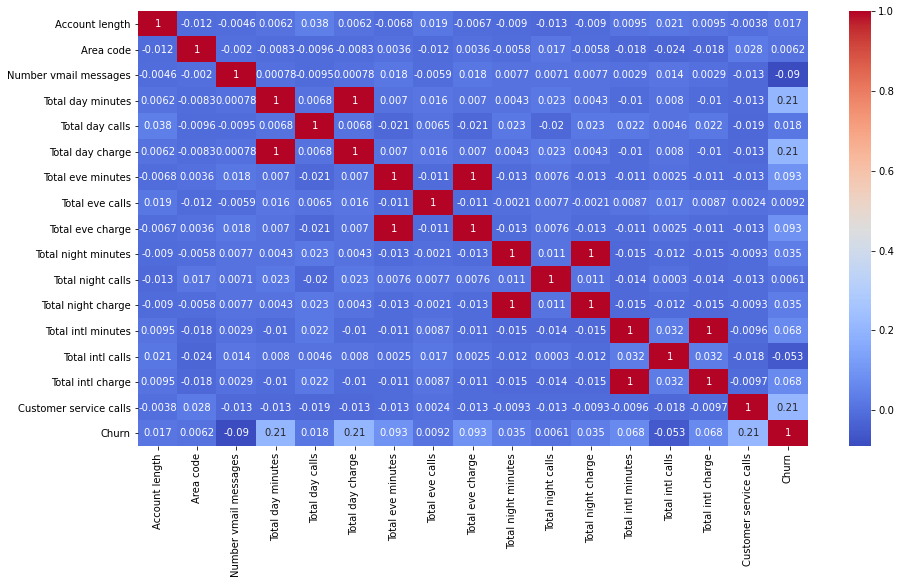

In [49]:
plt.figure(figsize = (15,8))
sns.heatmap(data = corr, annot = True, cmap = 'coolwarm')
plt.show()

## Observation:

With regard to the heatmap we can see high correlation bettween the following variables:

### With respect to churn
- Total day minutes to Churn at 0.2
- Total day charge to Churn at 0.2
- Customer service calls to Churn at 0.2

### Other relations:

- Total day charge to Total day minutes at 1
- Total evening charge to total eve minutes at 1
- total night charge to total night minutes at 1

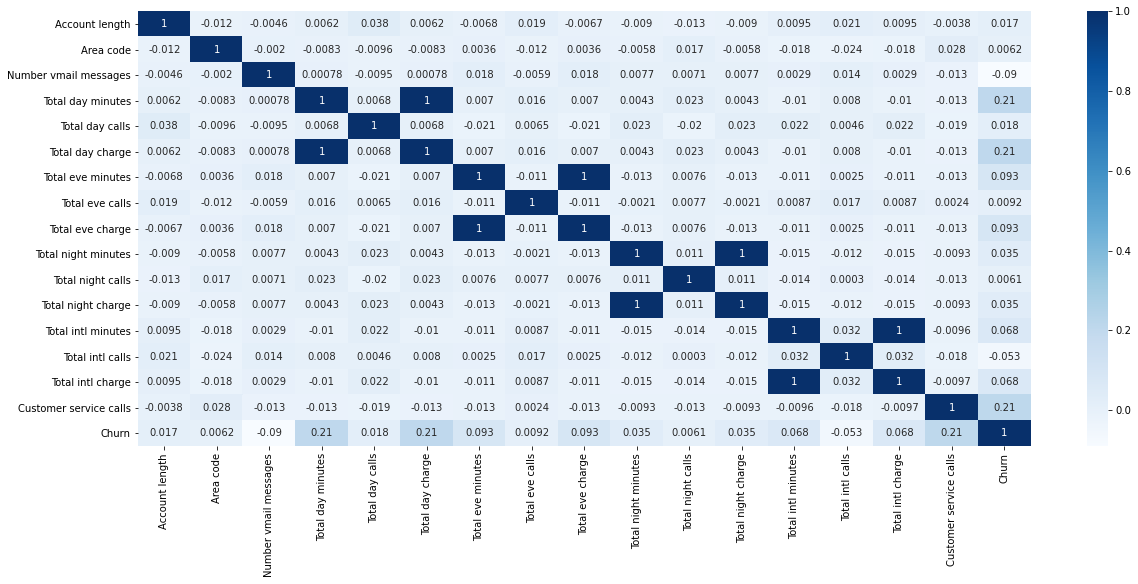

In [50]:
# Plot the heatmap to check the correlation
plt.figure(figsize = (20,8))
sns.heatmap(df.corr(), cmap = 'Blues', annot = True)
plt.show()

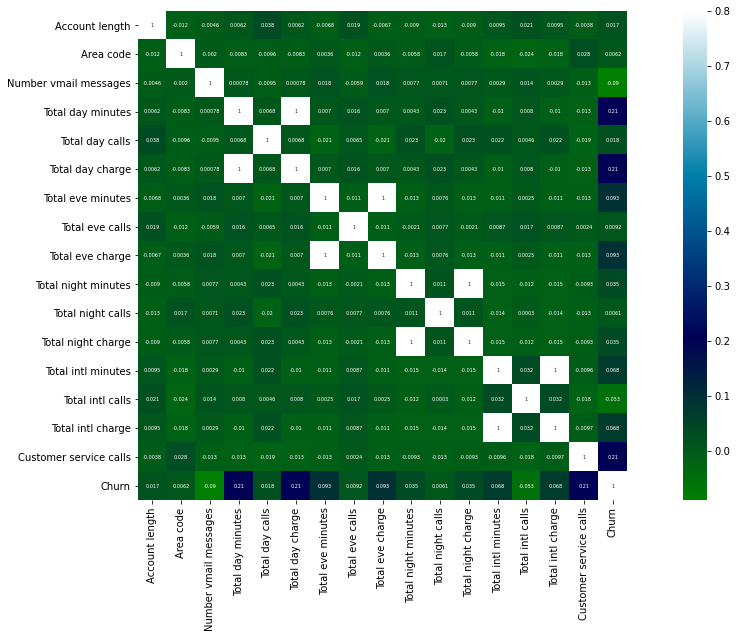

In [51]:
corr = df.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, cmap='ocean', 
            vmax=0.8, 
            annot_kws={"size":5}, 
            square=True, annot = True)

## Variables Analysis

In [52]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [53]:
df.dtypes # types of data in dataset object

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [54]:
numeric_columns = ["Account length", "Number vmail messages", "Total day minutes", "Total day calls", "Total day charge", "Total eve minutes", "Total eve calls", "Total eve charge", "Total night minutes", "Total night calls", "Total night charge", "Total intl minutes", "Total intl calls", "Total intl charge", "Customer service calls"]
categorical_columns = ["State", "Area code", "International plan", "Voice mail plan", "Churn"]
response = ["Churn"]

In [55]:
numeric = df[numeric_columns]
categorical = df[categorical_columns]
target = df[response]

In [56]:
df["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

We see quite a large disparity between our target variable. This can be an issue later on. Common ways to mitigate this issue is to look at different evaluation metrics, or perform some form of oversamping/undersamping of minority and majority class respectively

In [57]:
# Just making sure we split the columns correctly
len(numeric_columns) + len(categorical_columns) + len(response)

21

## 1.Numerical Data Description
### a) Correlation of numeric variables

In [58]:
numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00
Total night calls,3333.0,100.107711,19.568609,33.00,87.00,100.00,113.00,175.00


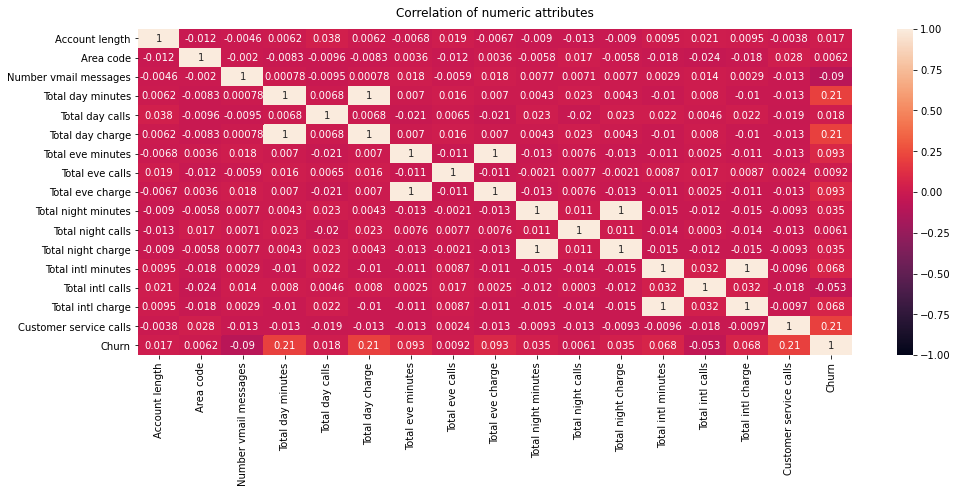

In [59]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation of numeric attributes', fontdict={'fontsize':12}, pad=12);

We can see that there are certain attributes with correlation of 1. Total minutes and total charge is perfectly correlated, regardless whether it is day calls, evening calls, night calls. or international calls.
We can immediately drop these attributes.

### Distribution of numeric variables

Histogram for Numerical Variables


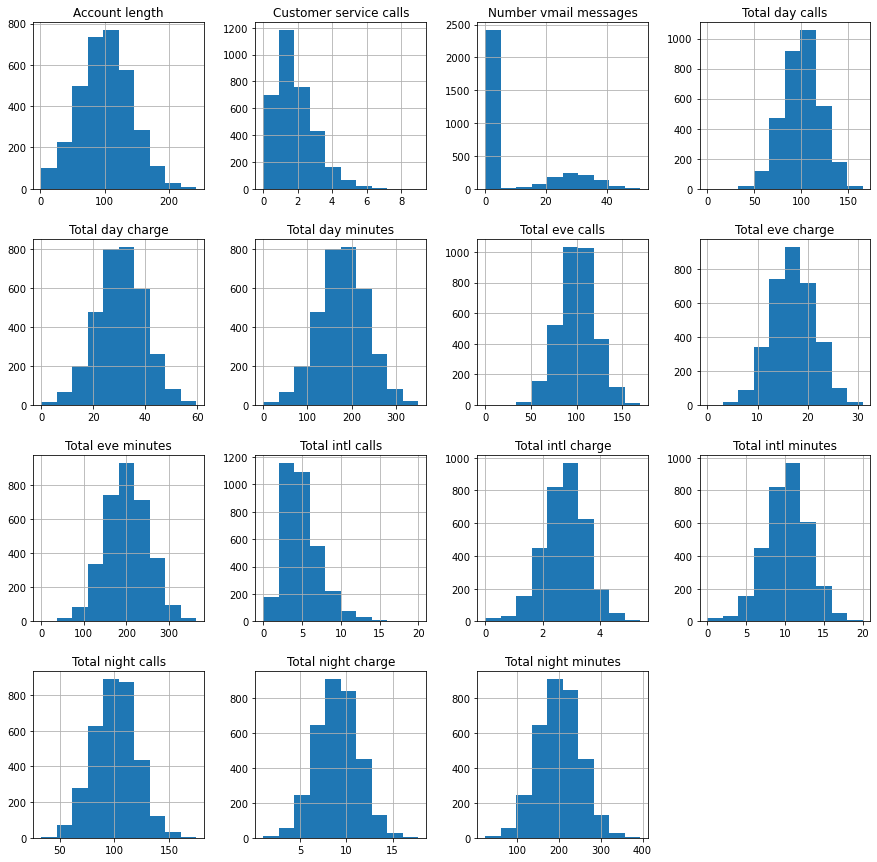

In [60]:
print ("Histogram for Numerical Variables")
plots = numeric.hist(figsize=(15,15))

### Removing multicollinearlity

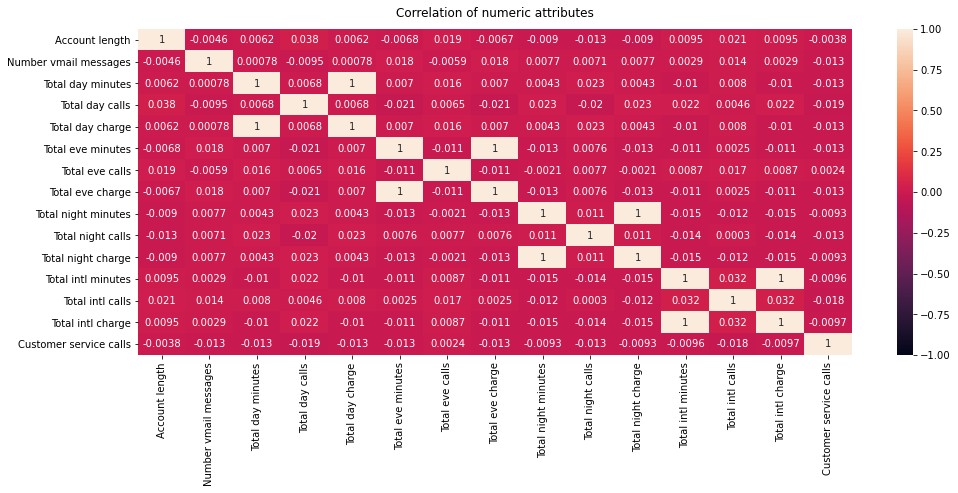

In [61]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(numeric.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation of numeric attributes', fontdict={'fontsize':12}, pad=12);

In [62]:
numeric.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


### Scaling numeric attributes

In [63]:
scaler = StandardScaler()
numeric = pd.DataFrame(scaler.fit_transform(numeric) , columns = numeric.columns)

In [64]:
numeric.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,0.676489,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932
1,0.149065,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932
2,0.902529,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218
3,-0.428590,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,-0.078806,-1.303026,1.024263,-1.306401,0.332354
4,-0.654629,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,-0.276562,-0.049184,-0.601195,-0.045885,1.092641


In [65]:
# sns.pairplot(numeric)
# plt.show()

### b) Categorical Variables

In [66]:
categorical.describe(include='O').T

,count,unique,top,freq
State,3333,51,WV,106
International plan,3333,2,No,3010
Voice mail plan,3333,2,No,2411


In [67]:
categorical.shape

(3333, 5)

In [68]:
categorical.head()

,State,Area code,International plan,Voice mail plan,Churn
0,KS,415,No,Yes,False
1,OH,415,No,Yes,False
2,NJ,415,No,No,False
3,OH,408,Yes,No,False
4,OK,415,Yes,No,False


## Feature Engeneering on categorical variables

In [69]:
len(categorical["State"].value_counts())

51

In [70]:
list(categorical.columns)

['State', 'Area code', 'International plan', 'Voice mail plan', 'Churn']

In [71]:
new_category = categorical.copy(deep=True)
new_category.head()

,State,Area code,International plan,Voice mail plan,Churn
0,KS,415,No,Yes,False
1,OH,415,No,Yes,False
2,NJ,415,No,No,False
3,OH,408,Yes,No,False
4,OK,415,Yes,No,False


In [72]:
nominal_categories =  ['Area code', 'State']
for category in nominal_categories:
    nominal_column = categorical[category]
    nominal_column = nominal_column.reset_index(drop=True)
    dummy_columns = pd.get_dummies(nominal_column.astype(str))
    new_category.drop(columns=[category], axis=1, inplace=True)
    new_category = new_category.reset_index(drop=True)
    new_category = pd.concat([new_category, dummy_columns], axis=1)

In [73]:
new_category.head()

,International plan,Voice mail plan,Churn,408,415,510,AK,AL,AR,AZ,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,No,Yes,False,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,No,Yes,False,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,No,No,False,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Yes,No,False,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Yes,No,False,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##  Label encoding ordinal values

In [74]:
intl_plan = {"International plan":{"No": 0, "Yes": 1}}
new_category = new_category.replace(intl_plan)

vm_plan = {"Voice mail plan":{"No": 0, "Yes": 1}}
new_category = new_category.replace(vm_plan)

new_churn = {"Churn":{False: 0, True: 1}}
new_category = new_category.replace(new_churn)

In [75]:
new_category

,International plan,Voice mail plan,Churn,408,415,510,AK,AL,AR,AZ,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3329,0,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3330,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3331,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Combining numeric and categorical columns

In [76]:
new_category = new_category.reset_index(drop=True)

In [77]:
combined_df = pd.concat([numeric, new_category], axis=1)

In [78]:
combined_df.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0.676489,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,...,0,0,0,0,0,0,0,0,0,0
1,0.149065,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,...,0,0,0,0,0,0,0,0,0,0
2,0.902529,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,...,0,0,0,0,0,0,0,0,0,0
3,-0.428590,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,...,0,0,0,0,0,0,0,0,0,0
4,-0.654629,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,...,0,0,0,0,0,0,0,0,0,0


In [79]:
combined_df.iloc[:,0:].transpose()

,0,1,2,3,4,5,6,7,8,9,...,3323,3324,3325,3326,3327,3328,3329,3330,3331,3332
Account length,0.676489,0.149065,0.902529,-0.428590,-0.654629,0.425335,0.500681,1.153683,1.002990,-0.679745,...,-1.332746,-1.106707,0.651374,0.324873,-0.428590,0.324873,0.123950,-1.031361,1.455068,2.082955
Number vmail messages,1.234883,1.307948,-0.591760,-0.591760,-0.591760,-0.591760,1.161817,-0.591760,2.111671,-0.591760,...,1.381014,-0.591760,-0.591760,-0.591760,-0.591760,1.307948,1.527146,-0.591760,-0.591760,-0.591760
Total day minutes,1.566767,-0.333738,1.168304,2.196596,-0.240090,0.801056,0.705572,-0.418205,1.447412,0.145520,...,-0.710166,-0.398006,-1.319797,0.441154,1.840366,-0.783616,-1.766002,0.259367,-0.183166,0.624778
Total day calls,0.476643,1.124503,0.675985,-1.466936,0.626149,-0.121381,-0.619735,-1.068253,-0.819076,1.323844,...,0.426808,0.825491,1.373680,-0.769241,0.626149,-0.619735,1.523186,0.875326,0.675985,0.227466
Total day charge,1.567036,-0.334013,1.168464,2.196759,-0.240041,0.801216,0.705083,-0.418264,1.447141,0.145570,...,-0.709902,-0.397741,-1.320182,0.441529,1.840312,-0.783352,-1.766281,0.258985,-0.182793,0.625153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
WA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
WI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
WV,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


In [80]:
dftotal.head()

,Churn,Total minutes,Total calls,Total charges
0,False,707.2,300,72.86
1,False,611.5,329,55.54
2,False,527.2,328,59.00
3,False,558.2,248,65.02
4,False,501.9,356,49.36


In [81]:
# Let's check the churn rate
print('Churn Rate is {}'.format(round(combined_df.Churn.sum()/len(dftotal.index)*100,2)))

Churn Rate is 14.49


In [82]:
#Let's find out the high value customers (Total Chare > 70 percentile)
pcet_70 = np.percentile(dftotal['Total charges'], 70)
print('70th Percentile of charge amount {}'.format(pcet_70))

70th Percentile of charge amount 62.11399999999999


In [83]:
# No of high value customers
high_value_cust = dftotal.loc[dftotal['Total charges'] >= pcet_70]

In [84]:
print('There are {} high value customers'.format(high_value_cust.shape[0]))

There are 1000 high value customers


In [85]:
classes = round(dftotal['Churn'].value_counts()/len(dftotal.index)*100,2)
non_churn_share = classes[0]
churn_share = classes[1]

In [86]:
print('Non Churn Share : {}'.format(non_churn_share))
print('Churn Share : {}'.format(churn_share))

Non Churn Share : 85.51
Churn Share : 14.49


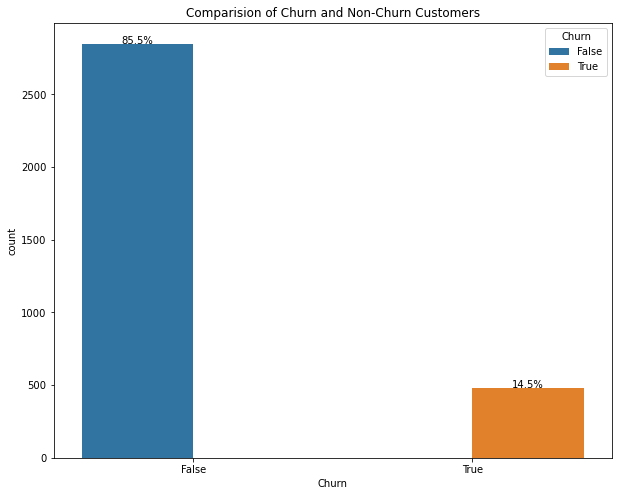

In [87]:
# Create a bar plot for the number and percentage of Churn vs Non-Churn customers
plt.figure(figsize = (10,8))
total = float(len(dftotal))
ax = sns.countplot(x= 'Churn', data = dftotal, hue = 'Churn')
plt.title('Comparision of Churn and Non-Churn Customers')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + (p.get_width()*0.5)
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha = 'center')

plt.show()

It has been observed that the dataset is highly imbalanced with 85.4% Non-Churn cases and only 14.6% Churn cases. Any machine learning model would work quite well or with great satisfaction when there is equal distribution of each of the class labels. But, in this instance, no matter which model we build, the underlying algorithm will learn more about the non-churn cases rather than the churn ones.

Therefore, to balance the class, we will use ADASYN sampling technique.

### Create response vector

In [88]:
y = combined_df['Churn'].values.astype(np.int)
y.size

3333

### Drop superflous columns

In [89]:
# df = df.drop(["Id","Churn"], axis = 1, inplace=True)
combined_df.drop(["Churn"], axis = 1, inplace=True)
combined_df.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0.676489,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,...,0,0,0,0,0,0,0,0,0,0
1,0.149065,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,...,0,0,0,0,0,0,0,0,0,0
2,0.902529,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,...,0,0,0,0,0,0,0,0,0,0
3,-0.428590,-0.591760,2.196596,-1.466936,2.196759,-2.742865,-0.608159,-2.743268,-0.078551,-0.567714,...,0,0,0,0,0,0,0,0,0,0
4,-0.654629,-0.591760,-0.240090,0.626149,-0.240041,-1.038932,1.098699,-1.037939,-0.276311,1.067803,...,0,0,0,0,0,0,0,0,0,0


### Build feature matrix

In [90]:
X = combined_df.values.astype(np.float)
print(X)
X.shape

[[ 0.67648946  1.23488274  1.56676695 ...  0.          0.
   0.        ]
 [ 0.14906505  1.30794844 -0.33373776 ...  0.          0.
   0.        ]
 [ 0.9025285  -0.59175986  1.16830364 ...  0.          0.
   0.        ]
 ...
 [-1.03136103 -0.59175986  0.25936661 ...  0.          0.
   0.        ]
 [ 1.45506837 -0.59175986 -0.18316638 ...  0.          1.
   0.        ]
 [ 2.08295458 -0.59175986  0.62477766 ...  0.          0.
   0.        ]]


(3333, 71)

### Standardize Feature Matrix values

In [91]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.67648946,  1.23488274,  1.56676695, ..., -0.1548003 ,
        -0.18123975, -0.15378117],
       [ 0.14906505,  1.30794844, -0.33373776, ..., -0.1548003 ,
        -0.18123975, -0.15378117],
       [ 0.9025285 , -0.59175986,  1.16830364, ..., -0.1548003 ,
        -0.18123975, -0.15378117],
       ...,
       [-1.03136103, -0.59175986,  0.25936661, ..., -0.1548003 ,
        -0.18123975, -0.15378117],
       [ 1.45506837, -0.59175986, -0.18316638, ..., -0.1548003 ,
         5.51755346, -0.15378117],
       [ 2.08295458, -0.59175986,  0.62477766, ..., -0.1548003 ,
        -0.18123975, -0.15378117]])

This completes the data preparation steps.

### Split Train/Test Validation Data

We need to adopt Stratified Cross Validation - Since the Response values are not balanced

In [92]:
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10):
    stratified_k_fold = model_selection.StratifiedKFold(n_splits=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    # tt -> train
    # ss -> test indices
    for tt, ss in stratified_k_fold.split(X, y): 
        X_train, X_test = X[tt], X[ss]
        y_train = y[tt]
        clf = clf_class
        clf.fit(X_train,y_train)
        y_pred[ss] = clf.predict(X_test)
    return y_pred

### Build Models and Train

We will build models using a variety of approaches to see how they compare:

In [93]:
# create classifiers
from sklearn.ensemble import GradientBoostingClassifier
gradient_boost = GradientBoostingClassifier()

from sklearn.svm import SVC
svc_model = SVC(gamma='auto')

from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=10)

from sklearn.neighbors import KNeighborsClassifier
k_neighbors = KNeighborsClassifier()

from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(solver='lbfgs')

In [94]:
print('Gradient Boosting Classifier:  {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, gradient_boost))))
print('Support vector machine(SVM):   {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, svc_model))))
print('Random Forest Classifier:      {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, random_forest))))
print('K Nearest Neighbor Classifier: {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, k_neighbors))))
print('Logistic Regression:           {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, logistic_regression))))

Gradient Boosting Classifier:  0.95
Support vector machine(SVM):   0.87
Random Forest Classifier:      0.93
K Nearest Neighbor Classifier: 0.85
Logistic Regression:           0.86


### Model Evaluation

We will now generate confusion matrices for the various models to analyze the prediction in more detail.

### 1.Gradient Boosting Classifier

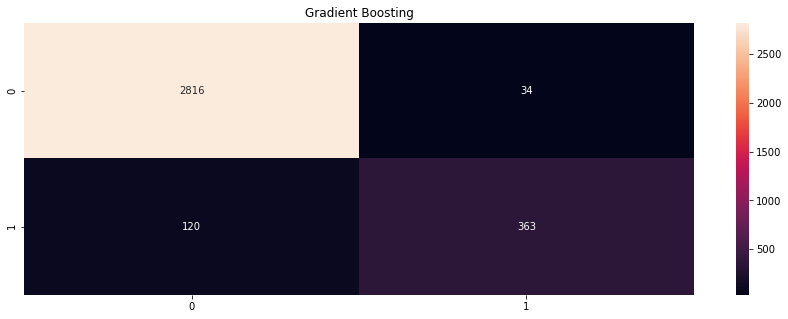

In [95]:
grad_ens_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, gradient_boost))
sns.heatmap(grad_ens_conf_matrix, annot=True,  fmt='');
title = 'Gradient Boosting'
plt.title(title);

### 2.Support Vector Machines

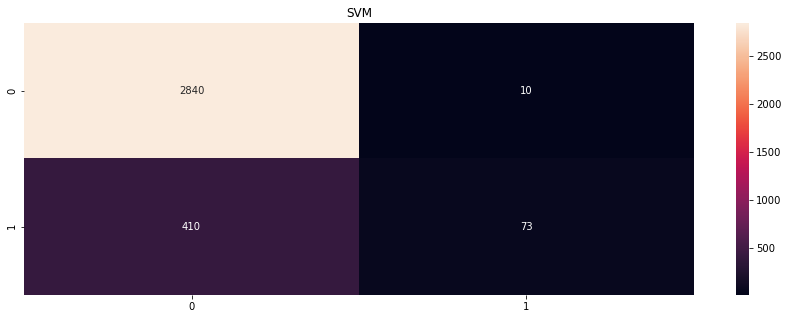

In [96]:
svm_svc_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, svc_model))
sns.heatmap(svm_svc_conf_matrix, annot=True,  fmt='');
title = 'SVM'
plt.title(title);

### 3.Random Forest

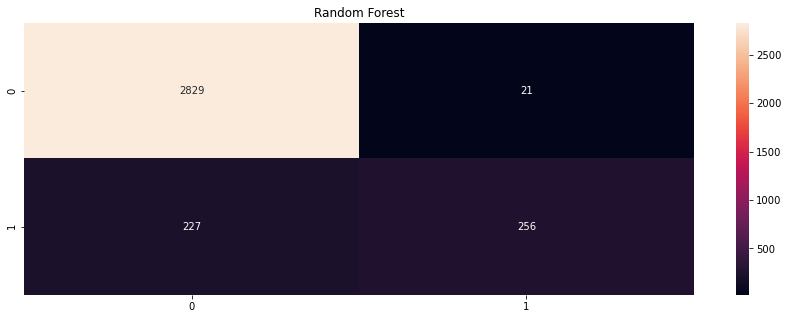

In [97]:
random_forest_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, random_forest))
sns.heatmap(random_forest_conf_matrix, annot=True,  fmt='');
title = 'Random Forest'
plt.title(title);

### Classification Report

In [98]:
print('Gradient Boosting Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, gradient_boost))))
print('Support vector machine(SVM):\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, svc_model))))
print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, random_forest))))

Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      2850
           1       0.91      0.74      0.81       483

    accuracy                           0.95      3333
   macro avg       0.93      0.86      0.89      3333
weighted avg       0.95      0.95      0.95      3333


Support vector machine(SVM):
               precision    recall  f1-score   support

           0       0.87      1.00      0.93      2850
           1       0.86      0.14      0.25       483

    accuracy                           0.87      3333
   macro avg       0.87      0.57      0.59      3333
weighted avg       0.87      0.87      0.83      3333


Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      2850
           1       0.92      0.52      0.66       483

    accuracy                           0.92      3333
   macro avg       0.92      0.76     

### Final Model Selection

Gradient Boosting seems to do comparatively better for this case

In [99]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X, y)

GradientBoostingClassifier()

[2.70971233e-03 4.09414691e-02 1.31758307e-01 2.83802235e-03
 1.51354513e-01 8.31700309e-02 5.23848110e-04 5.58390221e-02
 1.27587170e-02 3.42974731e-03 6.39685468e-03 2.06484506e-02
 1.10314008e-01 6.33555144e-02 1.61313986e-01 9.45691018e-02
 4.51980740e-02 5.43053037e-04 3.11161086e-04 2.78169265e-04
 0.00000000e+00 1.12486823e-04 0.00000000e+00 2.60017783e-04
 4.65751622e-05 0.00000000e+00 0.00000000e+00 5.33478733e-04
 0.00000000e+00 0.00000000e+00 2.54012399e-04 7.03092880e-04
 9.83281985e-04 0.00000000e+00 4.46474305e-04 1.87083492e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.27762305e-03
 0.00000000e+00 1.92282873e-04 6.93028140e-04 0.00000000e+00
 0.00000000e+00 5.59546356e-04 2.00193847e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.04700903e-04 2.23490454e-03
 0.00000000e+00 0.00000000e+00 2.59155605e-04 0.00000000e+00
 0.00000000e+00 5.92612872e-04 0.00000000e+00 2.50548027e-06
 5.27939702e-05 0.00000000e+00 0.00000000e+00 8.39661096e-04
 0.00000000e+00 1.126336

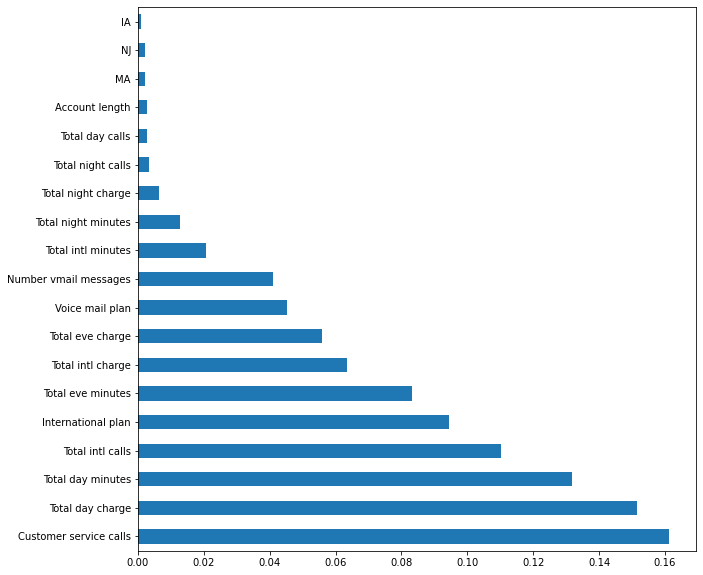

In [100]:
# Get Feature Importance from the classifier
feature_importance = gbc.feature_importances_
print (gbc.feature_importances_)
feat_importances = pd.Series(gbc.feature_importances_, index=combined_df.columns)
feat_importances = feat_importances.nlargest(19)
feat_importances.plot(kind='barh' , figsize=(10,10)) 